## Lab 6 : Normally Distributed Data

#### The Normal Distribution

We saw in class that a normal random variable has the pdf 
$$ f(t) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(t-\mu)^2}{2\sigma^2}},$$
which we can plot using the python skills we have been developing through the term. By choosing different values of $\sigma$ and $\mu$ we can see that $\sigma$ changes how the distribution is spread out and $\mu$ changes the location of the center of the distribution. We have seen in class that $\mathbb{E}(X) = \mu$ and $\mathbb{V}(X)= \sigma^2$, so this is as we expect. 

Text(0.5, 1.0, 'Normal distributions with $\\sigma = 1$')

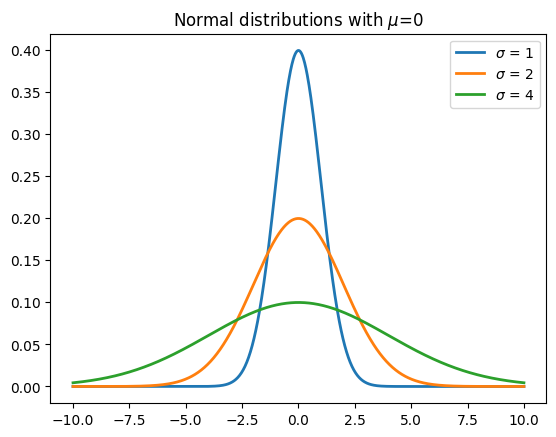

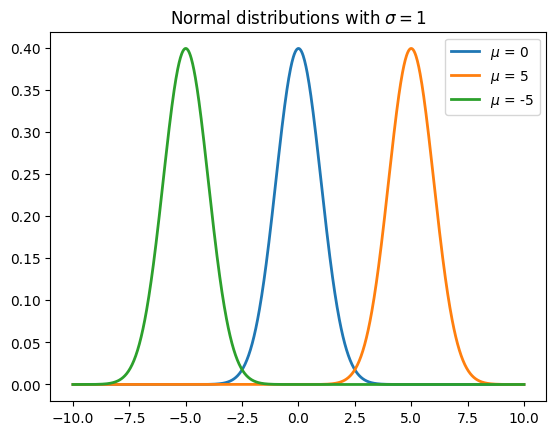

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def normal_pdf(t,mu,sigma): # PDF for the normal distribution
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(t-mu)**2/(2*sigma**2))

t = np.linspace(-10,10,1000) #Create 1000 points between -10 and 10. 


## Create some normal distribution pdfs with different variances 
for sigma in [1,2,4]:
    y = [normal_pdf(j,0,sigma) for j in t] #Evaluate normal_pdf at 
    plt.plot(t,y, linewidth = 2, label = f"$\sigma$ = {sigma}");
plt.legend()
plt.title("Normal distributions with $\mu$=0")

# Create some normal distribution pdfs with different means
plt.figure(2)
for mu in [0,5,-5]:
    y = y = [normal_pdf(j,mu,1) for j in t] #Evaluate normal_pdf at 
    plt.plot(t,y, linewidth = 2, label = f"$\mu$ = {mu}");
plt.legend()
plt.title("Normal distributions with $\sigma = 1$")


The <code>numpy.random</code> submodule has a random number generator that generates normally distributed random variables, the code is <code>np.random.normal(mu,sigma,size)</code>.

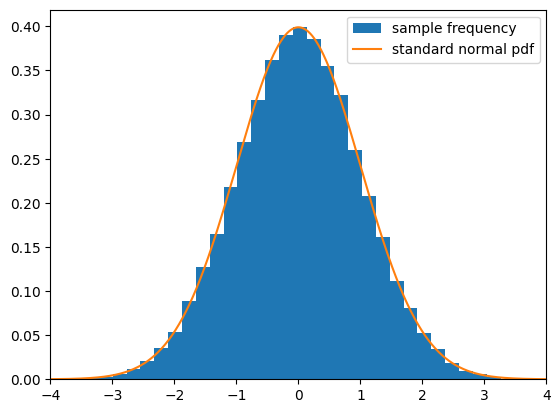

In [4]:
np.random.normal() # Generate a standard normal random value
np.random.normal(1,2) # Generate a normal random value with mu = 1 and sigma = 2
x = np.random.normal(0,1,50000); # Generate 50000 standard random values
#Plot a histogram of samples
plt.hist(x,bins = 40, align="mid", density = True, label = "sample frequency");

#Plot the pdf to compare
t = np.linspace(-4,4,1000)
y = [normal_pdf(j,0,1) for j in t]
plt.plot(t,y, label = "standard normal pdf")
plt.xlim(-4,4)
plt.legend()

I also mentioned in class that it isn't possible to compute the cumulative density function for the normal distribution, and that in practice we use computers to calculate approximations to that integral for us. So if $Z$ is a standard normal random variable and we want to calculate
$$P(Z<a) = \int_{-\infty}^a \frac{1}{\sqrt{2\pi}}^{-\frac{t^2}{2}}dt$$ 
we can use the python function from the scipy library <code>sp.stats.norm.cdf(a)</code>

From the rainfall example in class we had $P(X<500) = 1-P(Z<2)$

<b>Note:</b> You may have to run `pip install scipy` before this code will work

In [5]:
from scipy import stats
Px = 1- stats.norm.cdf(2)
print(f"The probability that we have less than 500 mm of rain next year is approximately {Px}")

The probability that we have less than 500 mm of rain next year is approximately 0.02275013194817921


### The Kolmogorov-Smirnov Test

The normal distribution is very convenient for a lot of reasons. The most important of those being the Central Limit Theorem; the idea that as you add up random variables, the distribution of the sum approaches a normal distribution. In practice, this means that as errors start to accumulate in measurements, the result often looks normally distributed. Therefore, we should expect a lot of the data we see to be normally distributed, or at least well approximated by a normal distribution. The Kolmogorov-Smirnov test allows us to determine whether or not that is actually true. It is a statistical test, based on the hypothesis testing ideas we have been discussing in class, to determine whether or not a data set is normally distributed. 

The test statistic for the Kolmogorov-Smirnoff test is a comparison of the <i> empirical density function </i> of the collected data with the cumulative density function for a normal distribution with a known mean $\mu$ and variance $\sigma^2$.. For a set of observed data $\{x_1,x_2,...,x_n\}$, the empirical density function is 
$$ F_n(x) = \frac{\#~ \text{observations less than}~x}{n}.$$
I.e. the empirical density function returns the proportion of the data that are less than a given value of $x$. 

The test statistic we use in this hypothesis test is the maximum difference between the empirical density function $F_n(x)$ and the cdf $F(x)$ of the normal distribution with mean $\mu$ and variance $\sigma^2$, 
$$ D_n = \sqrt{n}\max_{x} \vert F(x) - F_n(x)\vert.$$
The distribution of $D_n$ is called the Kolmogorov distribution, which is included as part of the `scipy` package. You can access the distribution using `scipy.stats.kstwobign`. If the frequency distribution of the data is close to being normally distributed, then $D_n$ will be very close to zero.  

The tasks in today's lab will walk us through implementing the Kolmogorov-Smirnov test to determine if a given data-set is normally distributed.

## Tasks


<b>Task 1</b><br>
Sample 100 values from a binomial distribution with $n=100$ and $p =0.25$. 
Calculate the sample mean $\mu_X$ and sample variance $\sigma_X^2$ of the sampled using the formulae 
$$\mu_X =\frac{1}{n} \sum_{j=1}^{n} x_j$$
$$\sigma_X^2 = \frac{1}{n-1}\sum_{j=1}^{n} (x_j-\mu )^2. $$
Compare these values with the theoretical values for the exponential distribution $\mu = np$ and $\sigma^2 = np(1-p)$. 

<b>Task 2</b><br>
Plot a histogram of the sampled data. On the same axes, plot the pdf for a normal distribution with with the theoretical mean and variance from task 1. In a markdown box, explain what you see. Based on this visual inspection, do you think the data are normally distributed?

<b>Task 3</b><br>
Create a function to calculuate the empirical density function of the data. Plot the empirical density function on the same axes as the cdf for the normal distribution in task 2. In a markdown box, describe what you notice.  

<b>Task 4</b><br>
Create a function that calculates the test statistic $D_n$. Use this function to conduct a hypothesis test to determine if $D_n$ is different from zero with significance $\alpha = 0.05$. I.e. you should reject the null hypothesis if  $D_n > K_\alpha$ where you can find the critical value $K_\alpha$ using `scipy.stats.kstwobign.ppf(1-alpha)`.

In a markdown box, explain what you are using as your null hypothesis, what the alternative hypothesis is, and what you conclude from your hypothesis test.

<b>Task 5</b><br>
Sample 1000 values from an exponential distribution with $\lambda = 2$. Implement the same procedure as in tasks 1-4 with these data to determine if they are normally distributed. 